In [1]:
# loading in stuff we need
from astropy.io import fits
import numpy as np
import math 

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.path import Path
from matplotlib.patches import PathPatch

# fits IO 

from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 12

from astropy.table import Table

from astropy.io import ascii
from astropy.table import Table, join

from scipy import stats

In [2]:
#Gettig the tables
environment = ascii.read('EnvironmentMeasuresv05/EnvironmentMeasuresv05.dat')

magphys = Table.read('MagPhys.fits')  
galaxyzoo = Table.read('galaxy_zoo_gama_cleaned.fits')  
groupgalaxies = Table.read('G3CGalv10.fits')  

galaxyzoo['CATAID'] = np.asarray(galaxyzoo['survey_id'],dtype='float')

In [3]:
galaxyzoo

region,subject_id,survey_id,zooniverse_id,features_total,edgeon_total,bar_total,spiral_total,bulge_total,spiralwinding_total,spiralnumber_total,bulgeshape_total,round_total,mergers_total,oddtype_total,discuss_total,odd_total,features_smooth_frac,features_features_frac,features_star_or_artifact_frac,edgeon_yes_frac,edgeon_no_frac,bar_bar_frac,bar_no_bar_frac,spiral_spiral_frac,spiral_no_spiral_frac,bulge_no_bulge_frac,bulge_obvious_frac,bulge_dominant_frac,spiralwinding_tight_frac,spiralwinding_medium_frac,spiralwinding_loose_frac,spiralnumber_1_frac,spiralnumber_2_frac,spiralnumber_3_frac,spiralnumber_4_frac,spiralnumber_more_than_4_frac,bulgeshape_rounded_frac,bulgeshape_boxy_frac,bulgeshape_no_bulge_frac,round_completely_round_frac,round_in_between_frac,round_cigar_shaped_frac,mergers_merging_frac,mergers_tidal_debris_frac,mergers_both_frac,mergers_neither_frac,oddtype_none_frac,oddtype_ring_frac,oddtype_lens_or_arc_frac,oddtype_irregular_frac,oddtype_other_frac,oddtype_dust_lane_frac,oddtype_overlapping_frac,discuss_yes_frac,discuss_no_frac,CATAID
bytes6,bytes24,bytes7,bytes10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
gama09,5857c4a3d369fd0040000001,598860,AGZ000dir0,24.22130599640355,1.7395928847607092,1.7395928847607092,1.7395928847607092,1.7395928847607092,0.0,0.0,0.0,21.4838099398336,23.223402824594306,6.478225992933209,24.221305996403547,23.22340282459431,0.8869798326739101,0.07182077155620795,0.04119939576988185,0.0,1.0,0.14388693913485856,0.8561130608651415,0.0,1.0,0.14388693913485856,0.13737897860831294,0.7187340822568286,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.04654667876882854,0.9534533212311714,0.0,0.0,0.0,0.0,1.0,0.8982460515841436,0.06311610283868091,0.0,0.0,0.038637845577175416,0.0,0.0,0.04128596534590179,0.9587140346540982,598860.0
gama09,5857c4a3d369fd0040000003,598875,AGZ000dir2,30.26078678485824,2.647863871684903,2.4779669874054298,2.4779669874054298,2.4779669874054298,1.0,1.0,0.16989688427947328,24.96907467306071,27.616938544745615,9.125830859090332,30.260786784858244,27.616938544745615,0.82512972483434,0.08750148799864746,0.0873687871670125,0.06416375331688165,0.9358362466831184,0.0,1.0,0.4035566273007761,0.5964433726992239,0.4035566273007761,0.4035566273007761,0.19288674539844775,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.009571179422221666,0.9904288205777784,0.0,0.0510150817658332,0.03620966163138526,0.0,0.9127752566027815,0.811858174053503,0.0,0.0,0.0,0.18814182594649703,0.0,0.0,0.00789746464299786,0.9921025353570021,598875.0
gama09,5857c4a3d369fd0040000005,598877,AGZ000dir1,24.83652016836818,0.489288189231712,0.2503046955289972,0.2503046955289972,0.2503046955289972,0.0,0.0,0.23898349370271485,22.489608576101148,22.978896765332863,7.522414780805664,24.83652016836818,22.97889676533286,0.9055056192913827,0.019700351978248144,0.07479402873036915,0.4884309471642274,0.5115690528357726,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.48509024655205796,0.5149097534479421,0.0,0.05391831933254118,0.007888954343574102,0.0,0.9381927263238847,0.8867588202793433,0.0,0.0,0.024098573759847662,0.057373087705513005,0.0,0.031769518255296114,0.0,1.0,598877.0
gama09,5857c4a3d369fd0040000007,598888,AGZ000dir4,30.87525040915166,5.47796698740543,4.47796698740543,4.47796698740543,4.47796698740543,0.0,0.0,1.0,23.486246367569994,28.964213354975424,12.066044787761523,30.875250409151658,28.964213354975424,0.7606819720110995,0.1774225930093742,0.06189543497952618,0.18254947543479766,0.8174505245652024,0.0,1.0,0.0,1.0,0.0,0.9466312515534682,0.053368748446531944,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.1451436864210536

In [4]:
groupgalaxies

CATAID,RA,Dec,Z,Rpetro,DM_100_25_75,SURVEY_CODE,SigErr,GroupID,RankIterCen,SepIterCen,CoSepIterCen,AngSepIterCen,RankBCG,SepBCG,CoSepBCG,AngSepBCG,RankCen,SepCen,CoSepCen,AngSepCen
,deg,deg,,mag,mag,,km / s,,,arcsec,Mpc / h,Mpc / h,,arcsec,Mpc / h,Mpc / h,,arcsec,Mpc / h,Mpc / h
int32,float64,float64,float32,float32,float32,int16,float32,int32,int16,float32,float32,float32,int16,float32,float32,float32,int16,float32,float32,float32
6802,174.00598431,0.72093463,0.051813804,18.622816,36.044518,5,24.158697,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0
6803,174.02164811,0.75488515,0.16169676,19.219088,38.683414,5,40.067787,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0
6804,174.0920547,0.67409614,0.2202978,19.3412,39.43489,5,24.125309,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0
6805,174.02235464,0.70253177,0.33400568,19.301096,40.477726,5,58.761257,203003,2,12.394894,0.056041796,0.0420283,2,12.394894,0.056041796,0.0420283,2,8.251231,0.037306797,0.027978072
6806,174.02280711,0.70594494,0.33285415,18.544878,40.468914,5,24.662685,203003,1,0.0,0.0,0.0,1,0.0,0.0,0.0,1,4.1436634,0.018735,0.014050233
6807,174.07693167,0.64402556,0.38845164,19.627243,40.86566,5,45.5613,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566471,36.556764,-5.654681,0.3555094,19.42052,40.63739,5,35.506996,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0


In [5]:
gama = join(magphys, galaxyzoo, join_type='right', keys='CATAID')
gama2 = join(gama, groupgalaxies, join_type='right', keys='CATAID')

In [6]:
gama2

CATAID,Z_1,f_mu_SFH_best_fit,f_mu_SFH_percentile2_5,f_mu_SFH_percentile16,f_mu_SFH_percentile50,f_mu_SFH_percentile84,f_mu_SFH_percentile97_5,f_mu_IR_best_fit,f_mu_IR_percentile2_5,f_mu_IR_percentile16,f_mu_IR_percentile50,f_mu_IR_percentile84,f_mu_IR_percentile97_5,mu_parameter_best_fit,mu_parameter_percentile2_5,mu_parameter_percentile16,mu_parameter_percentile50,mu_parameter_percentile84,mu_parameter_percentile97_5,tau_V_best_fit,tau_V_percentile2_5,tau_V_percentile16,tau_V_percentile50,tau_V_percentile84,tau_V_percentile97_5,sSFR_0_1Gyr_best_fit,sSFR_0_1Gyr_percentile2_5,sSFR_0_1Gyr_percentile16,sSFR_0_1Gyr_percentile50,sSFR_0_1Gyr_percentile84,sSFR_0_1Gyr_percentile97_5,mass_stellar_best_fit,mass_stellar_percentile2_5,mass_stellar_percentile16,mass_stellar_percentile50,mass_stellar_percentile84,mass_stellar_percentile97_5,L_dust_best_fit,L_dust_percentile2_5,L_dust_percentile16,L_dust_percentile50,L_dust_percentile84,L_dust_percentile97_5,T_C_ISM_best_fit,T_C_ISM_percentile2_5,T_C_ISM_percentile16,T_C_ISM_percentile50,T_C_ISM_percentile84,T_C_ISM_percentile97_5,T_W_BC_best_fit,T_W_BC_percentile2_5,T_W_BC_percentile16,T_W_BC_percentile50,T_W_BC_percentile84,T_W_BC_percentile97_5,xi_C_tot_best_fit,xi_C_tot_percentile2_5,xi_C_tot_percentile16,xi_C_tot_percentile50,xi_C_tot_percentile84,xi_C_tot_percentile97_5,xi_PAH_tot_best_fit,xi_PAH_tot_percentile2_5,xi_PAH_tot_percentile16,xi_PAH_tot_percentile50,xi_PAH_tot_percentile84,xi_PAH_tot_percentile97_5,xi_MIR_tot_best_fit,xi_MIR_tot_percentile2_5,xi_MIR_tot_percentile16,xi_MIR_tot_percentile50,xi_MIR_tot_percentile84,xi_MIR_tot_percentile97_5,xi_W_tot_best_fit,xi_W_tot_percentile2_5,xi_W_tot_percentile16,xi_W_tot_percentile50,xi_W_tot_percentile84,xi_W_tot_percentile97_5,tau_V_ISM_best_fit,tau_V_ISM_percentile2_5,tau_V_ISM_percentile16,tau_V_ISM_percentile50,tau_V_ISM_percentile84,tau_V_ISM_percentile97_5,mass_dust_best_fit,mass_dust_percentile2_5,mass_dust_percentile16,mass_dust_percentile50,mass_dust_percentile84,mass_dust_percentile97_5,SFR_0_1Gyr_best_fit,SFR_0_1Gyr_percentile2_5,SFR_0_1Gyr_percentile16,SFR_0_1Gyr_percentile50,SFR_0_1Gyr_percentile84,SFR_0_1Gyr_percentile97_5,metalicity_Z_Zo_percentile2_5,metalicity_Z_Zo_percentile16,metalicity_Z_Zo_percentile50,metalicity_Z_Zo_percentile84,metalicity_Z_Zo_percentile97_5,tform_percentile2_5,tform_percentile16,tform_percentile50,tform_percentile84,tform_percentile97_5,gamma_percentile2_5,gamma_percentile16,gamma_percentile50,gamma_percentile84,gamma_percentile97_5,tlastb_percentile2_5,tlastb_percentile16,tlastb_percentile50,tlastb_percentile84,tlastb_percentile97_5,agem_percentile2_5,agem_percentile16,agem_percentile50,agem_percentile84,agem_percentile97_5,ager_percentile2_5,ager_percentile16,ager_percentile50,ager_percentile84,ager_percentile97_5,sfr16_percentile2_5,sfr16_percentile16,sfr16_percentile50,sfr16_percentile84,sfr16_percentile97_5,sfr17_percentile2_5,sfr17_percentile16,sfr17_percentile50,sfr17_percentile84,sfr17_percentile97_5,sfr18_percentile2_5,sfr18_percentile16,sfr18_percentile50,sfr18_percentile84,sfr18_percentile97_5,sfr19_percentile2_5,sfr19_percentile16,sfr19_percentile50,sfr19_percentile84,sfr19_percentile97_5,sfr29_percentile2_5,sfr29_percentile16,sfr29_percentile50,sfr29_percentile84,sfr29_percentile97_5,fb16_percentile2_5,fb16_percentile16,fb16_percentile50,fb16_percentile84,fb16_percentile97_5,fb17_percentile2_5,fb17_percentile16,fb17_percentile50,fb17_percentile84,fb17_percentile97_5,fb18_percentile2_5,fb18_percentile16,fb18_percentile50,fb18_percentile84,fb18_percentile97_5,fb19_percentile2_5,fb19_percentile16,fb19_percentile50,fb19_percentile84,fb19_percentile97_5,fb29_percentile2_5,fb29_percentile16,fb29_percentile50,fb29_percentile84,fb29_percentile97_5,URL_SED,URL_FIT,URL_PNG,region,subject_id,survey_id,zooniverse_id,features_total,edgeon_total,bar_total,spiral_total,bulge_total,spiralwinding_total,spiralnumber_total,bulgeshape_total,round_total,mergers_total,oddtype_total,discuss_total,odd_to

In [7]:
#All spiral galaxies that are in a group
m0 = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['GroupID']>0.)
)

#All spiral galaxies that are not in a group
m0n = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['GroupID']==0.)
)

# one-armed spirals that are in a group
m1 = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_1_frac']>0.5) 
    & (gama2['spiralnumber_1_frac']<1) 
    & (gama2['GroupID']>0.)
     )

# one-armed spirals that are not a group
m1n = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_1_frac']>0.5) 
    & (gama2['spiralnumber_1_frac']<1) 
    & (gama2['GroupID']==0.)
     )

# two-armed spirals that are in a group
m2 = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_2_frac']>0.5) 
    & (gama2['spiralnumber_2_frac']<1) 
    & (gama2['GroupID']>0.)
     )

# one-armed spirals that are not a group
m2n = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_2_frac']>0.5) 
    & (gama2['spiralnumber_2_frac']<1) 
    & (gama2['GroupID']==0.)
     )

# three-armed spirals that are in a group
m3 = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_3_frac']>0.5) 
    & (gama2['spiralnumber_3_frac']<1) 
    & (gama2['GroupID']>0.)
     )

# three-armed spirals that are not a group
m3n = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_3_frac']>0.5) 
    & (gama2['spiralnumber_3_frac']<1) 
    & (gama2['GroupID']==0.)
     )

# four-armed spirals that are in a group
m4 = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_4_frac']>0.5) 
    & (gama2['spiralnumber_4_frac']<1) 
    & (gama2['GroupID']>0.)
     )


# four-armed spirals that are not a group
m4n = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_4_frac']>0.5) 
    & (gama2['spiralnumber_4_frac']<1) 
    & (gama2['GroupID']==0.)
     )

# 5+-armed spirals that are in a group
m5 = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_more_than_4_frac']>0.5) 
    & (gama2['spiralnumber_more_than_4_frac']<1) 
    & (gama2['GroupID']>0.)
     )

# 5+-armed spirals that are not a group
m5n = np.where(
    (gama2['Z_1']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_more_than_4_frac']>0.5) 
    & (gama2['spiralnumber_more_than_4_frac']<1) 
    & (gama2['GroupID']==0.)
     )


Text(0, 0.5, 'Stellar Mass')

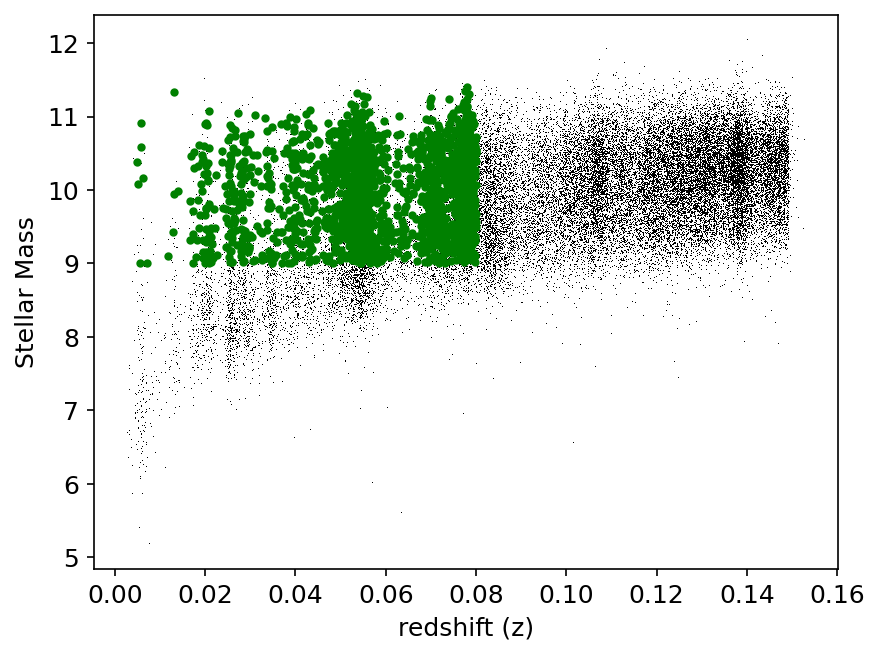

In [8]:
#Stellar mass vs Redshift for three-arm spirals that are in a group
plt.plot(gama2['Z_1'],np.log10(gama2['mass_stellar_best_fit']),'k,')
plt.plot(gama2['Z_1'][m0],np.log10(gama2['mass_stellar_best_fit'])[m0],'g.')
plt.xlabel('redshift (z)')
plt.ylabel('Stellar Mass')

In [19]:
#Fraction of one-arm spiral in a group
x1 = len(gama2['Z_1'][m1])/len(gama2['Z_1'][m1n])
x1
x1_err = np.sqrt(x1*(1.-x1)/(len(gama2['Z_1'][m1])+len(gama2['Z_1'][m1n])))
x1,x1_err

/Users/benneholwerda/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


(1.2127659574468086, nan)

In [10]:
#Fraction of two-arm spiral in a group
x2 = len(gama2['Z_1'][m2])/len(gama2['Z_1'][m2n])
x2

1.1030110935023771

In [11]:
#Fraction of three-arm spiral in a group
x3 = len(gama2['Z_1'][m3])/len(gama2['Z_1'][m3n])
x3

1.2105263157894737

In [12]:
#Fraction of four-arm spiral in a group
x4 = len(gama2['Z_1'][m4])/len(gama2['Z_1'][m4n])
x4

0.7142857142857143

In [13]:
#Fraction of four-arm spiral in a group
x5 = len(gama2['Z_1'][m5])/len(gama2['Z_1'][m5n])
x5

1.2

In [14]:
#Fraction of all arm spiral in a group
x6 = len(gama2['Z_1'][m0])/len(gama2['Z_1'][m0n])
x6

1.0605898123324398

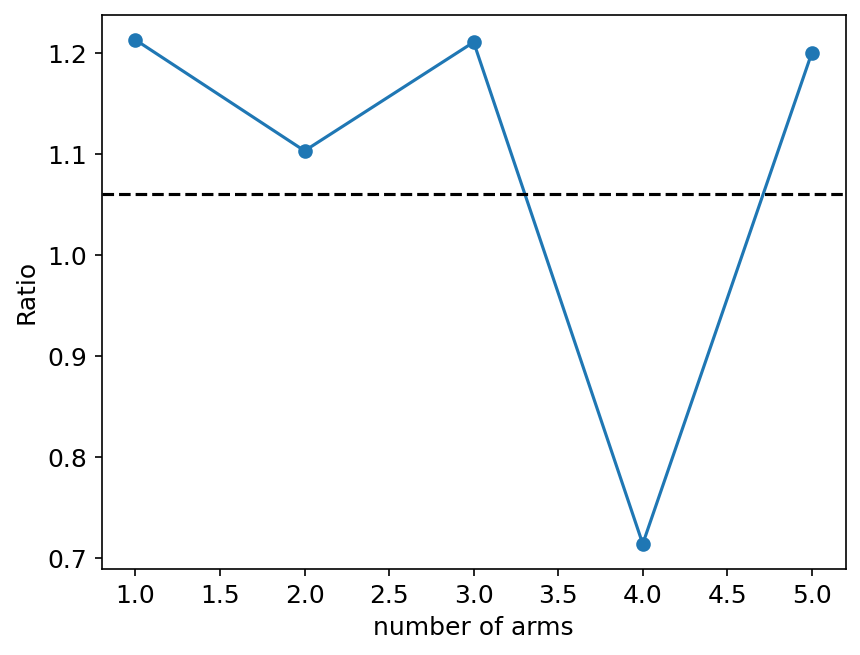

In [15]:
x = [x1, x2, x3, x4, x5]
y = [1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.plot(y, x, marker='o')
plt.axhline(x6, linestyle='--', color='black')
plt.ylabel('Ratio');
plt.xlabel('number of arms');

In [16]:
#How big are the groups
#m1 = np.where(
#    (gama2['Z_1']<0.08)
#    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
#    & (gama2['spiral_spiral_frac']>0.3)
#    & (gama2['spiralnumber_1_frac']>0.5) 
#    & (gama2['spiralnumber_1_frac']<1) 
#    & (gama2['GroupID']>0.)
#     )

#stmass = np.log10(bothtables['mass_stellar_best_fit'])

In [50]:
x1 = len(gama2['Z_1'][m1])/(len(gama2['Z_1'][m1])+len(gama2['Z_1'][m1n]))
x1_err = np.sqrt(x1*(1.-x1)/(len(gama2['Z_1'][m1])+len(gama2['Z_1'][m1n])))

x2 = len(gama2['Z_1'][m2])/(len(gama2['Z_1'][m2])+len(gama2['Z_1'][m2n]))
x2_err = np.sqrt(x2*(1.-x2)/(len(gama2['Z_1'][m2])+len(gama2['Z_1'][m2n])))

x3 = len(gama2['Z_1'][m3])/(len(gama2['Z_1'][m3])+len(gama2['Z_1'][m3n]))
x3_err = np.sqrt(x3*(1.-x3)/(len(gama2['Z_1'][m3])+len(gama2['Z_1'][m3n])))

x4 = len(gama2['Z_1'][m4])/(len(gama2['Z_1'][m4])+len(gama2['Z_1'][m4n]))
x4_err = np.sqrt(x4*(1.-x4)/(len(gama2['Z_1'][m4])+len(gama2['Z_1'][m4n])))

x5 = len(gama2['Z_1'][m5])/(len(gama2['Z_1'][m5])+len(gama2['Z_1'][m5n]))
x5_err = np.sqrt(x5*(1.-x5)/(len(gama2['Z_1'][m5])+len(gama2['Z_1'][m5n])))


x6 = len(gama2['Z_1'][m0])/(len(gama2['Z_1'][m0])+len(gama2['Z_1'][m0n]))
x6_err = np.sqrt(x6*(1.-x6)/len(gama2['Z_1']))



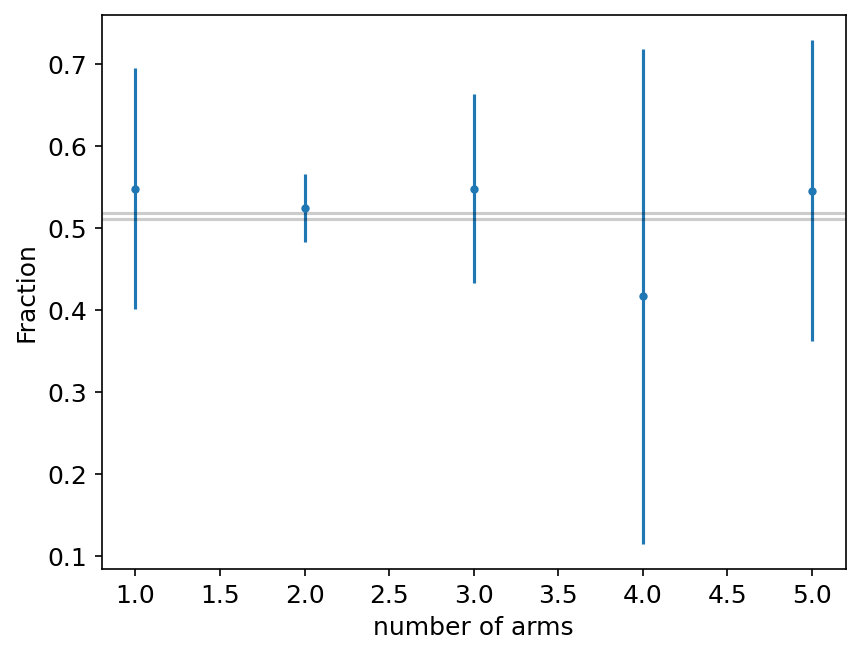

In [52]:
y = [x1, x2, x3, x4, x5]
yerr = np.asarray([x1_err, x2_err, x3_err, x4_err, x5_err])
x = [1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.errorbar( x,y,3*yerr,fmt='C0.')
#plt.axhline(x6, linestyle='--', color='black')
plt.axhline(x6+3*x6_err, linestyle='-', color='black',alpha=0.2)
plt.axhline(x6-3*x6_err, linestyle='-', color='black',alpha=0.2)

plt.ylabel('Fraction');
plt.xlabel('number of arms');
plt.savefig('arms_groupfraction.png')